# Wine 데이터로 군집화, 실루엣 분석하기

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

###  Wine 데이터 군집화

In [14]:
from sklearn.datasets import load_wine
wine = load_wine()

In [15]:
# 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_std = scaler.fit_transform(wine.data)

In [16]:
# 데이터프레임
wineDF = pd.DataFrame(wine_std, columns=wine.feature_names)
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### K-Means 객체 생성 / 학습

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,  random_state=2021)
kmeans.fit(wineDF)

KMeans(n_clusters=3, random_state=2021)

In [18]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [19]:
wineDF['target'] = wine.target # 실제 class
wineDF['cluster'] = kmeans.labels_ # Clustering 결과 class
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0,1


### 정확도 확인하기

In [20]:
clustering_result = wineDF.groupby(['target','cluster']).count()
clustering_result

alcohol  malic_acid  ash  alcalinity_of_ash  magnesium  \
target cluster                                                           
0      1             59          59   59                 59         59   
1      0              3           3    3                  3          3   
       1              3           3    3                  3          3   
       2             65          65   65                 65         65   
2      0             48          48   48                 48         48   

                total_phenols  flavanoids  nonflavanoid_phenols  \
target cluster                                                    
0      1                   59          59                    59   
1      0                    3           3                     3   
       1                    3           3                     3   
       2                   65          65                    65   
2      0                   48          48                    48   

                proanthocyanins  color_intensity  hue  \
target cluster                                          
0      1                     59               59   59   
1      0                      3                3    3   
       1                      3                3    3   
       2                     65               65   65   
2      0                     48               48   48   

                od280/od315_of_diluted_wines  proline  
target cluster                                         
0      1                                  59       59  
1      0                                   3        3  
       1                                   3        3  
       2                                  65       65  
2      0                                  48       48

### 군집화 결과를 차원 축소하여 시각화하기

In [21]:
from sklearn.decomposition import PCA

# 차원 축소
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)
wine_pca[:5]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

In [22]:
wineDF['pca_x'] = wine_pca[:, 0]
wineDF['pca_y'] = wine_pca[:, 1]
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,pca_x,pca_y
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0,1,3.316751,-1.443463
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0,1,2.209465,0.333393
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0,1,2.516740,-1.031151
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0,1,3.757066,-2.756372
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0,1,1.008908,-0.869831


### 비교하기

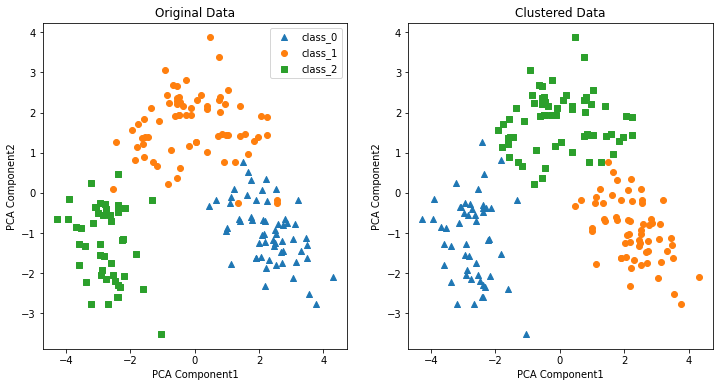

In [23]:
markers = ['^', 'o', 's']
fig, asx = plt.subplots(figsize=(12,6), ncols=2, nrows=1)
col = ['target', 'cluster']
for k, item in enumerate(col):
    ax = asx[k]
    for i,marker in enumerate(markers):
        x_axis_data = wineDF[wineDF[item] == i]['pca_x']
        y_axis_data = wineDF[wineDF[item] == i]['pca_y']
        ax.scatter(x_axis_data, y_axis_data, marker=marker,                         label=wine.target_names[i])

    if k == 0:
        ax.set_title('Original Data')
        ax.legend()
    else:
        ax.set_title('Clustered Data')
    ax.set_xlabel('PCA Component1')
    ax.set_ylabel('PCA Component2')

### 클러스터별 평균 실루엣 계수의 시각화하기

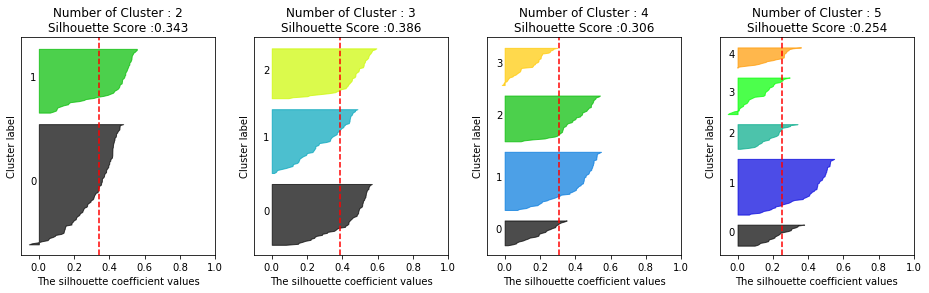

In [24]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5], wineDF)


### 데이터 클러스터링 평가

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(wine_std, wineDF.cluster)
wineDF['실루엣 계수'] = score_samples
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,pca_x,pca_y,실루엣 계수
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0,1,3.316751,-1.443463,0.448395
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0,1,2.209465,0.333393,0.250138
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0,1,2.516740,-1.031151,0.376445
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0,1,3.757066,-2.756372,0.461332
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0,1,1.008908,-0.869831,0.219424


In [26]:
silhouette_score(wine_std, wineDF.cluster)

0.2848589191898987

In [27]:
wineDF['실루엣 계수'].mean()

0.2848589191898986

In [28]:
wineDF.groupby('cluster')['실루엣 계수'].mean()

cluster
0    0.350622
1    0.343413
2    0.177409
Name: 실루엣 계수, dtype: float64